<a href="https://colab.research.google.com/github/nikeshthapa255/AI-MLOPS/blob/main/Convolutional_Neural_Networks_Cat_Dog_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 1: CNN - Cats & Dogs

## Learning Objectives:

At the end of the experiment, you will be able to:

1. Understand Conv2D and MaxPooling layers used in ConVNet
2. Build a simple ConvNet for image classification using the digit MNIST dataset
3. Build another  ConvNet for  image Classification using the cats-and-dogs dataset
4. Apply Data Augmentation





## Call Back Function

In [1]:
# Define a function to return a commmonly used callback_list
def def_callbacks(filepath, mod_chk_mon = "val_loss", earlystop = 0 ):
    callback_list = []

    # Defualt callback
    callback_list.append(keras.callbacks.ModelCheckpoint(filepath,
                                         save_best_only = True,
                                         monitor=mod_chk_mon))

    if earlystop>0:
       callback_list.append(keras.callbacks.EarlyStopping(patience=earlystop))

    return callback_list

#### Observations from models with and without pooling layers
1. The initial model with pooling layers had just 104,202 parameters but the model without pooling layers (model_no_max_pool) has 712,202 parameters i.e. increase in the number of trainable parameters. **Model with pooling layer is less prone to overfitting** due to a smaller number of parameters/weights.

2. What other advantage does the pooing layer provide? **They facilitate learning a spatial hierarchy of features**.

  In the CNN given below. Imagine a 1x1 patch on a C3 feature map. It contains information from 6x6 window of the input layer. On the other hand, if no pooling layers are present, then it would contain information from a 3x3 window in the input layer.


![picture](https://drive.google.com/uc?export=view&id=1vT8e59AYTFRlrrI3C-iUHTctxyhfBiJJ)

**Optional Exercise:** Train the model_no_max_pool
 with the MNIST data set and compare its accuracy with the first model.

## 2. Image Classification


Now, we know how to build a simple CNN, let's build and train one to solve an image classification problem.

We will work with the cats-vs-dogs dataset to classify whether a given image is that of a cat or a dog .i.e a  binary classification problem.

### Import libraries

In [2]:
import os
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory

We have already uploaded the dataset into structured folders. You simply need to download it from our repository.

In [3]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/cats_vs_dogs_small.zip
!unzip -qq '/content/cats_vs_dogs_small.zip'

In [4]:
# defining path names for futur use
data_dir = '/content/cats_vs_dogs_small'

train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

shape of the dog image is: (254, 500, 3)
Mean across height of all dog images in train set is: 363.293
Mean across width of all dog images in train set is: 397.275


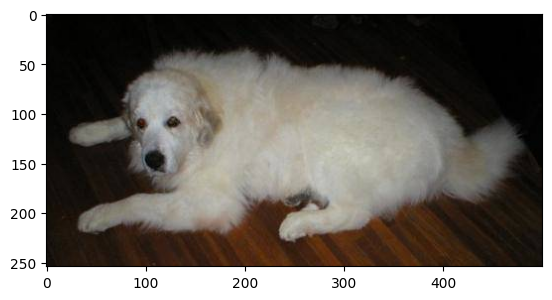

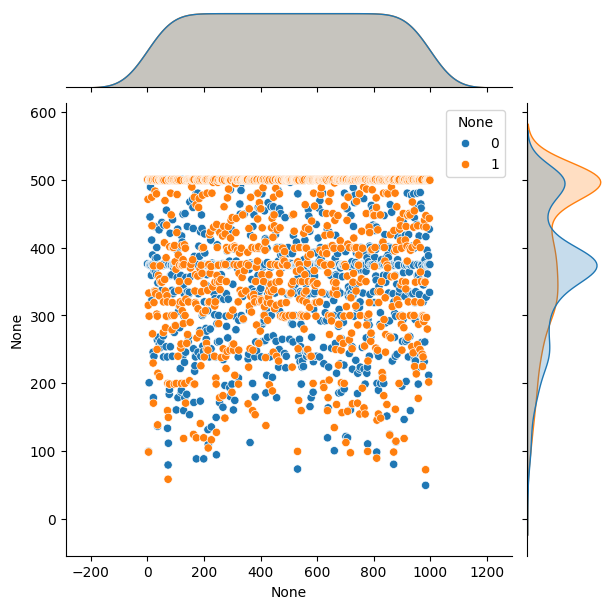

In [5]:
# Visualise the original data
dog_image = train_path + '/dog/' +  'dog.443.jpg'
print("shape of the dog image is:",imread(dog_image).shape)
plt.imshow(imread(dog_image))

dim1 = []
dim2 = []

for image_file in os.listdir(train_path+'/dog'):
    img = imread(train_path +'/dog/'+image_file)
    d1,d2,colour_channels = img.shape
    dim1.append(d1)
    dim2.append(d2)

sns.jointplot((dim1,dim2))
print("Mean across height of all dog images in train set is:",np.mean(dim1))
print("Mean across width of all dog images in train set is:",np.mean(dim2))
# Q: Do all the images in the dataset have the same sizes? A: No

### Converting the image dataset into a workable format

We have the images in folders. We need to make it into a workable dataset:
  * Which has labels
  * All the images have the same size

For this, we will use the utility [**image_dataset_from_directory**](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).

Calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

In [24]:
IMAGE_SIZE = [200, 200]
train_dataset = image_dataset_from_directory(
               train_path,
                image_size=IMAGE_SIZE, # Resize the images to (180,180)
                batch_size=32)
validation_dataset = image_dataset_from_directory(
                      validation_path,
                      image_size=IMAGE_SIZE,
                      batch_size=32)
test_dataset = image_dataset_from_directory(
                test_path,
                image_size=IMAGE_SIZE,
                batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
print(f"train_dataset = {train_dataset}")

train_dataset = <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
# Verify batch size
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break
# Q: What is the batch size of each mini-batch? A: 32

data batch shape: (32, 200, 200, 3)
labels batch shape: (32,)


In [9]:
# Define covnet model
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Rescaling(1./255)(inputs)  # Rescale input to lie between 0 and 1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # Q: Why sigmoid? A: Binary classification
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                        

In [11]:
# compile the model
model.compile(loss="binary_crossentropy",   # Q: Why binary_crossentropy? A: Binary classification
                      optimizer="rmsprop",
                      metrics=["accuracy"])

In [12]:
# fit the model
PARTIAL_RUN = False
epochs = 10
if PARTIAL_RUN:
  epochs = 2
history = model.fit(train_dataset,
                    epochs= epochs,
                    validation_data= validation_dataset,
                    callbacks= def_callbacks("convnet_from_scratch_keras_model"))
## Using a previously defined callback function

Epoch 1/10
63/63 [==============================] - 10s 76ms/step - loss: 0.7057 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 3s 49ms/step - loss: 0.6951 - accuracy: 0.5180 - val_loss: 0.6898 - val_accuracy: 0.5900
Epoch 3/10
63/63 [==============================] - 3s 49ms/step - loss: 0.6861 - accuracy: 0.5765 - val_loss: 0.6846 - val_accuracy: 0.6050
Epoch 4/10
63/63 [==============================] - 2s 35ms/step - loss: 0.6452 - accuracy: 0.6240 - val_loss: 0.7850 - val_accuracy: 0.5230
Epoch 5/10
63/63 [==============================] - 3s 49ms/step - loss: 0.6057 - accuracy: 0.6615 - val_loss: 0.6667 - val_accuracy: 0.6330
Epoch 6/10
63/63 [==============================] - 3s 49ms/step - loss: 0.5975 - accuracy: 0.6815 - val_loss: 0.6226 - val_accuracy: 0.6520
Epoch 7/10
63/63 [==============================] - 2s 35ms/step - loss: 0.5562 - accuracy: 0.7135 - val_loss: 1.1125 - val_accuracy: 0.5720
Epoch 8/10
6

In [13]:
test_model = keras.models.load_model("convnet_from_scratch_keras_model")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 13ms/step - loss: 0.5752 - accuracy: 0.7020
Test accuracy: 0.702


Great! From just **2000** images, our network has learnt to classify images of cats and dogs with an accuracy of apx **70%**

## 3. Data Augmentation

The small dataset can cause a high variance estimation of model performance

Q: How to overcome this and get a more robust model?

Now, we want to avoid this problem altogether by artificially (and cleverly) producing new data from the already available data.

For this, we perform **data augmentation**.

Data augmentation is another regularization method. What other methods did we see in the last tutorial?

Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformations that yield a believable-looking image. Common transformations include:
  * Flipping the image
  * Rotating the image
  * Zooming in/out of the image

See some sample images below after augmentation:

![picture](https://drive.google.com/uc?export=view&id=1HRhsHEHtcVptNVMF1EbCGiZX5XuTdrs5)

In [14]:
# Performing the data augmentation as series of transformations
def get_data_augmented(flip="horizontal",rotation=0.1,zoom=0.2):
    data_augmentation = keras.Sequential([
      keras.layers.RandomFlip(flip),
      keras.layers.RandomRotation(rotation),
      keras.layers.RandomZoom(zoom)])
    return data_augmentation
# Q: what does the above function return? A: A sequence of layers

data_augmentation = get_data_augmented()


In [15]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
# Augmenting data - Transformations of images by random factors
# so the the network never sees the same data twice
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Global max pooling instead of Flatten
x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)     # Q: Dropout is a regualization method
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 128)       102528    
                                                           

In [17]:
PARTIAL_RUN = False
epochs = 10
if PARTIAL_RUN:
  epochs = 2
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=def_callbacks("convnet_from_scratch_with_augmentation_keras"))

Epoch 1/10
63/63 [==============================] - 13s 115ms/step - loss: 0.7503 - accuracy: 0.5130 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 4s 57ms/step - loss: 0.6951 - accuracy: 0.5020 - val_loss: 0.7212 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 5s 82ms/step - loss: 0.6975 - accuracy: 0.5250 - val_loss: 0.6915 - val_accuracy: 0.5130
Epoch 4/10
63/63 [==============================] - 4s 57ms/step - loss: 0.7111 - accuracy: 0.5285 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 5s 87ms/step - loss: 0.6939 - accuracy: 0.5385 - val_loss: 0.6873 - val_accuracy: 0.5910
Epoch 6/10
63/63 [==============================] - 5s 82ms/step - loss: 0.6910 - accuracy: 0.5375 - val_loss: 0.6794 - val_accuracy: 0.5590
Epoch 7/10
63/63 [==============================] - 5s 82ms/step - loss: 0.7149 - accuracy: 0.5745 - val_loss: 0.6578 - val_accuracy: 0.6440
Epoch 8/10


In [18]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation_keras")

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 21ms/step - loss: 0.6240 - accuracy: 0.6465
Test accuracy: 0.646


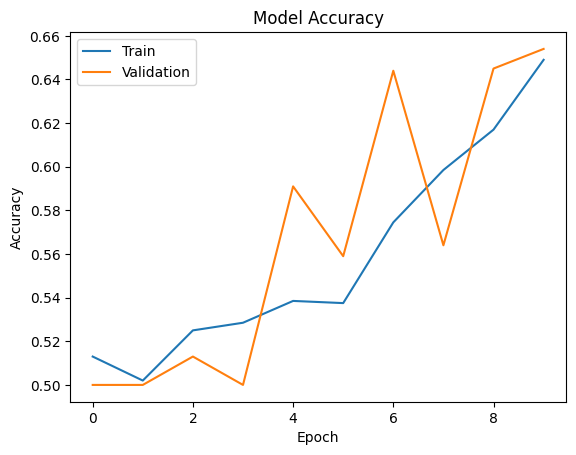

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

With data augmentation, we roughly get **82-85%** accuracy. This is a big improvement over the previous approach, where we got roughly 70% accuracy.

## Hyperparameter tuning

In [20]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [1]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

# Define paths
data_dir = '/content/cats_vs_dogs_small'
train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

# Load the full dataset
IMAGE_SIZE = [200, 200]
BATCH_SIZE = 8

train_dataset = image_dataset_from_directory(
    train_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    validation_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Define the model building function with more hyperparameters
def build_model(hp):
    inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

    # Data augmentation
    data_augmentation = keras.Sequential([
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])
    x = data_augmentation(inputs)

    x = layers.Rescaling(1./255)(x)

    # Hyperparameter tuning for number of filters and kernel size
    for i in range(hp.Int('conv_layers', 1, 4)):
        x = layers.Conv2D(filters=hp.Choice('filters_' + str(i), [16, 32, 64, 128, 256, 512]), kernel_size=hp.Choice('kernel_size_' + str(i), [3, 5]), activation='relu')(x)
        x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Flatten()(x)

    # Hyperparameter tuning for dropout rate

    for i in range(hp.Int('dense_layers', 1, 3)):
        x = layers.Dropout(hp.Float('dropout_' + str(i), 0.0, 0.5, step=0.1))(x)
        x = layers.Dense(units=hp.Choice('units_' + str(i), [16, 32, 64, 128, 256, 512]), activation='relu')(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs, outputs)

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='cat_dog_tuning'
)

# Run the hyperparameter search without early stopping
tuner.search(train_dataset, validation_data=validation_dataset, epochs=10)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 27 Complete [00h 00m 30s]
val_accuracy: 0.6859999895095825

Best val_accuracy So Far: 0.7260000109672546
Total elapsed time: 00h 18m 00s


In [25]:
# Print the best hyperparameters
print('Best hyperparameters:')
print(f'Number of convolutional layers: {best_hps.get("conv_layers")}')
for i in range(best_hps.get("conv_layers")):
    print(f'Filters in convolutional layer {i}: {best_hps.get("filters_" + str(i))}')
    print(f'Kernel size in convolutional layer {i}: {best_hps.get("kernel_size_" + str(i))}')
print(f'Number of dense layers: {best_hps.get("dense_layers")}')
for i in range(best_hps.get("dense_layers")):
    print(f'Dropout rate in dense layer {i}: {best_hps.get("dropout_" + str(i))}')
    print(f'Units in dense layer {i}: {best_hps.get("units_" + str(i))}')
print(f'Learning rate: {best_hps.get("learning_rate")}')

Best hyperparameters:
Number of convolutional layers: 3
Filters in convolutional layer 0: 64
Kernel size in convolutional layer 0: 3
Filters in convolutional layer 1: 128
Kernel size in convolutional layer 1: 5
Filters in convolutional layer 2: 64
Kernel size in convolutional layer 2: 3
Number of dense layers: 1
Dropout rate in dense layer 0: 0.4
Units in dense layer 0: 32
Learning rate: 0.00034736206543183105


### Train the best model

In [26]:
model = tuner.hypermodel.build(best_hps)

model.summary();

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 99, 99, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 95, 95, 128)       204928    
                                                          

In [12]:
## Save model
def download_model(model):
    from google.colab import files

    # Save the complete model
    model.save('best_cat_dog_model.h5')

    # Save just the model weights
    model.save_weights('best_cat_dog_model_weights.h5')

    # Download the saved model
    files.download('best_cat_dog_model.h5')
    files.download('best_cat_dog_model_weights.h5')

def show_test_accuracy(model, test_dataset):
    # Evaluate the model on the test dataset
    test_loss, test_acc = model.evaluate(test_dataset)
    print(f"Test accuracy: {test_acc:.3f}")

In [4]:
# Load model
from tensorflow import keras

# Load the saved model
model1 = keras.models.load_model('best_cat_dog_model.h5')

# Evaluate the model on the test dataset
test_loss, test_acc = model1.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# Load the model weights
model1.load_weights('best_cat_dog_model_weights.h5')

# Evaluate the model on the test dataset
test_loss, test_acc = model1.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# Continue using the model for predictions or further training


250/250 [==============================] - 2s 7ms/step - loss: 0.6947 - accuracy: 0.5040
Test accuracy: 0.504
250/250 [==============================] - 2s 7ms/step - loss: 0.6947 - accuracy: 0.5040
Test accuracy: 0.504


In [27]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model on the full dataset with data augmentation and early stopping
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping]
)
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/100
63/63 [==============================] - 8s 66ms/step - loss: 0.6948 - accuracy: 0.5075 - val_loss: 0.6925 - val_accuracy: 0.5520
Epoch 2/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6918 - accuracy: 0.5105 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6925 - val_accuracy: 0.5300
Epoch 4/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6914 - accuracy: 0.5540 - val_loss: 0.6861 - val_accuracy: 0.5820
Epoch 5/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6700 - accuracy: 0.5950 - val_loss: 0.6616 - val_accuracy: 0.6000
Epoch 6/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6352 - accuracy: 0.6430 - val_loss: 0.6499 - val_accuracy: 0.6000
Epoch 7/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6247 - accuracy: 0.6530 - val_loss: 0.5952 - val_accuracy: 0.6750
Epoch 

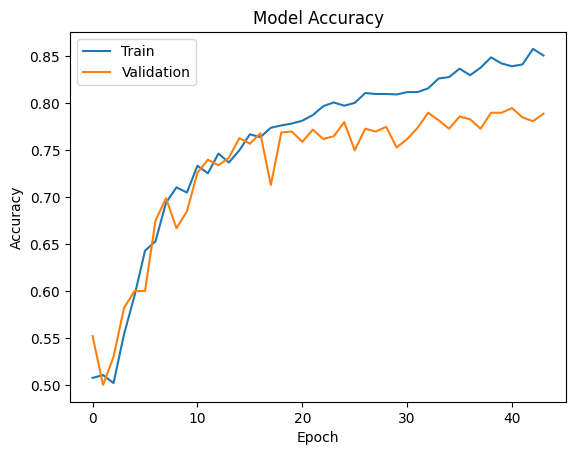

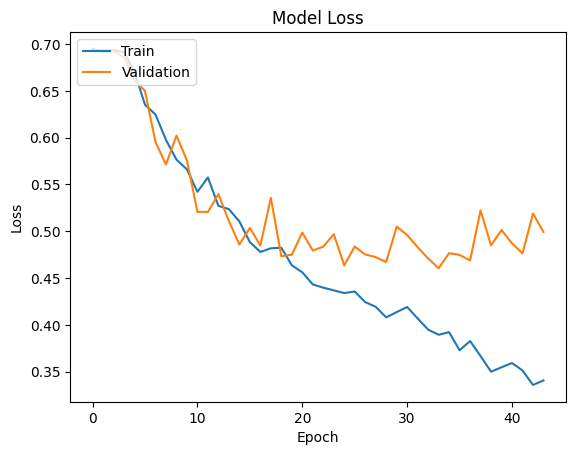

In [28]:
# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
# download the model
download_model(model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Transfer learning

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

# Define paths
data_dir = '/content/cats_vs_dogs_small'
train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

# Load the full dataset
IMAGE_SIZE = [200, 200]
BATCH_SIZE = 16

train_dataset = image_dataset_from_directory(
    train_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    validation_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    test_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Load the best saved model
best_model = keras.models.load_model('best_cat_dog_model.h5')

print('baseline accurary')
show_test_accuracy(best_model, test_dataset)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
baseline accurary
125/125 [==============================] - 2s 12ms/step - loss: 0.4969 - accuracy: 0.7605
Test accuracy: 0.761


### Extract the model and train it

In [33]:

# Extract the convolutional base from the best model
conv_base = keras.models.Model(inputs=best_model.input, outputs=best_model.get_layer('flatten_6').output)

# Freeze the convolutional base
conv_base.trainable = False

# Create a new model with the convolutional base and new dense layers
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = conv_base(inputs, training=False)


In [32]:
conv_base.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 99, 99, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 95, 95, 128)       204928    
                                                           

### Create new model

In [34]:
# Add new dense layers
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add dropout for regularization
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the final model
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Reduced learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model on the full dataset with data augmentation and early stopping
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,  # Setting a higher number of epochs, but early stopping will prevent overfitting
    callbacks=[early_stopping]
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


Epoch 1/100
125/125 [==============================] - 4s 25ms/step - loss: 0.6017 - accuracy: 0.6990 - val_loss: 0.5465 - val_accuracy: 0.7220
Epoch 2/100
125/125 [==============================] - 3s 23ms/step - loss: 0.4715 - accuracy: 0.8075 - val_loss: 0.4916 - val_accuracy: 0.7800
Epoch 3/100
125/125 [==============================] - 3s 23ms/step - loss: 0.4078 - accuracy: 0.8290 - val_loss: 0.4788 - val_accuracy: 0.7760
Epoch 4/100
125/125 [==============================] - 3s 23ms/step - loss: 0.3725 - accuracy: 0.8515 - val_loss: 0.4755 - val_accuracy: 0.7720
Epoch 5/100
125/125 [==============================] - 3s 23ms/step - loss: 0.3501 - accuracy: 0.8565 - val_loss: 0.4754 - val_accuracy: 0.7730
Epoch 6/100
125/125 [==============================] - 3s 22ms/step - loss: 0.3263 - accuracy: 0.8720 - val_loss: 0.4799 - val_accuracy: 0.7660
Epoch 7/100
125/125 [==============================] - 3s 23ms/step - loss: 0.3080 - accuracy: 0.8795 - val_loss: 0.4805 - val_accuracy:

#### Analyse the model

In [21]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 model_7 (Functional)        (None, 30976)             280512    
                                                                 
 dense_16 (Dense)            (None, 512)               15860224  
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 16141249 (61.57 MB)
Trainable params: 15860737 (60.50 MB)
Non-trainable params: 280512 (1.07 MB)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


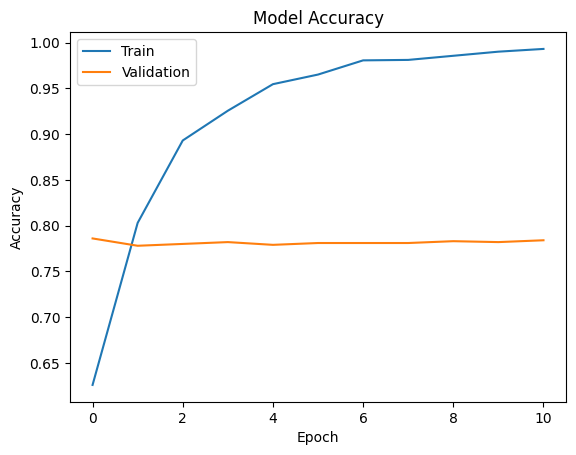

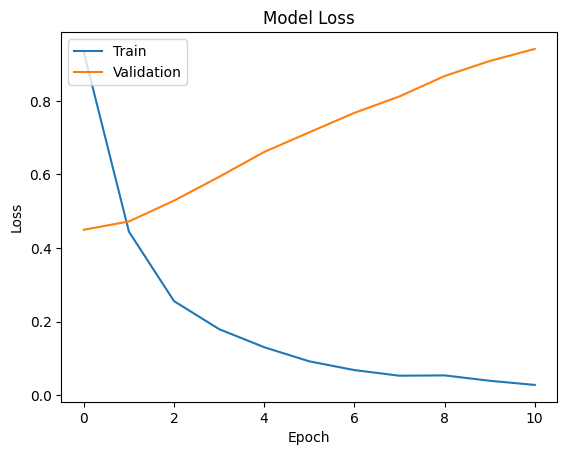

In [18]:
# Save the new model
model.save('transfer_learning_cat_dog_model.h5')

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()